# In this notebook, we run generation with a trained channel-conditioning model

In [1]:
!pip install -r requirements.txt

  Obtaining dependency information for pytorch-lightning from https://files.pythonhosted.org/packages/56/ed/192d7518b15a06452f480346eeebe1d1d4595af80687e142b2e6f18539fd/pytorch_lightning-2.2.1-py3-none-any.whl.metadata
  Using cached pytorch_lightning-2.2.1-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for fsspec[http]>=2022.5.0 from https://files.pythonhosted.org/packages/93/6d/66d48b03460768f523da62a57a7e14e5e95fdf339d79e996ce3cecda2cdb/fsspec-2024.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for torchmetrics>=0.7.0 from https://files.pythonhosted.org/packages/f3/0e/cedcb9c8aeb2d1f655f8d05f841b14d84b0a68d9f31afae4af55c7c6d0a9/torchmetrics-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for lightning-utilities>=0.8.0 from https://files.pythonhosted.org/packages/ca/7d/16afeaef22e9863a4ba1de55ffca3a85167d119ff6c6cc2373c4b1b3e253/lightning_utilities-0.11.0-py3-none-any.whl.metadata
Using cached pytorch_lightning-2.2.1-py3-none

In [2]:
import os
from argparse import ArgumentParser
from time import time
import matplotlib.pyplot as plt
from copy import deepcopy
import inspect
import gc
import numpy as np
import math

import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.nn import L1Loss
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.utils import save_image
from torchvision.transforms import Compose, ToTensor, Lambda, RandomAffine, Normalize
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

In [3]:
from model_with_channel_conditioning import DCGANLikeModelWithChannelConditioning
from idempotent_networks_v2 import IdempotentNetworkWithConditioning

In [4]:
# Initialize model
prior = torch.distributions.Normal(torch.zeros(1, 28, 28), torch.ones(1, 28, 28))
net = DCGANLikeModelWithChannelConditioning(data_channels=1, 
                                            latent_dim=16, 
                                            intermediate_dim=128, 
                                            embedding_dim=5)

In [5]:
model = (
    IdempotentNetworkWithConditioning.load_from_checkpoint(
        "checkpoints_with_channel_conditioning/best_checkpoint.ckpt", 
        prior=prior, 
        model=net
    )
    .eval()
)

In [6]:
model

IdempotentNetworkWithConditioning(
  (model): DCGANLikeModelWithChannelConditioning(
    (discriminator): DCGANDiscriminatorWithChannelConditioning(
      (activation): LeakyReLU(negative_slope=0.2, inplace=True)
      (final_activation): Sigmoid()
      (conv_1): Conv2d(2, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (conv_2): Conv2d(17, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (conv_3): Conv2d(33, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (conv_4): Conv2d(65, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (conv_5): Conv2d(129, 128, kernel_size=(2, 2), stride=(1, 1), bias=False)
      (dropout_1): Dropout(p=0.15, inplace=False)
      (dropout_2): Dropout(p=0.15, inplace=False)
      (dropout_3): Dropout(p=0.15, inplace=False)
      (dropout_4): Dropout(p=0.15, inplace=False)
      (dropout_5): Dropout(p=0.15, inplace=False)
      (batch_norm_1): BatchNorm2d(16, eps=1e-

### Utility functions to visualize generated images

In [25]:
def map_noise_to_label(model, noise, label):
    y = torch.full(
        (noise.shape[0],),
        label
    )
    
    return model(noise, y)[0]

def plot_noise_to_label(model, noise, label, path = None):
    generated_images = map_noise_to_label(model, noise, label)
    
    num_generated_images = generated_images.shape[0]
    
    f, axarr = plt.subplots(math.ceil(num_generated_images / 2), 2)
    
    for idx, image in enumerate(generated_images):
        row_number = math.floor(idx / 2)
        col_number = int(math.remainder(idx, 2))
        axarr[row_number, col_number].imshow(
            generated_images[idx].squeeze().detach().numpy(), 
            cmap = 'gray')
        
        axarr[row_number, col_number].set_axis_off()
        
    if path:
        plt.savefig(path, bbox_inches='tight')

In [28]:
noise = model.prior.sample_n(n = 6)
noise.shape

torch.Size([6, 1, 28, 28])

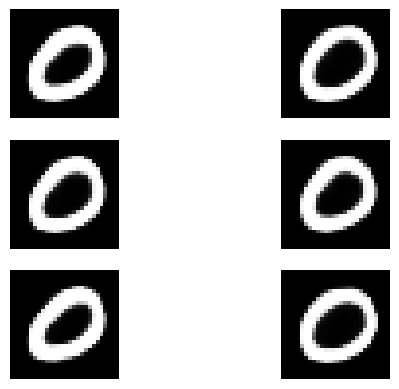

In [30]:
plot_noise_to_label(model, noise, label = 0, path = 'zero.png')

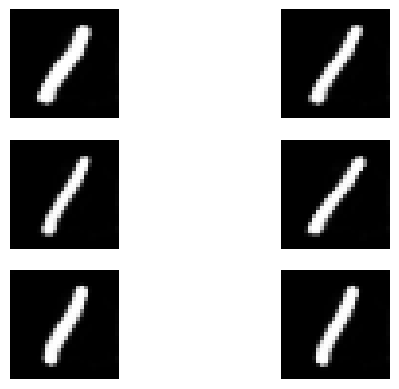

In [31]:
plot_noise_to_label(model, noise, label = 1, path = 'one.png')

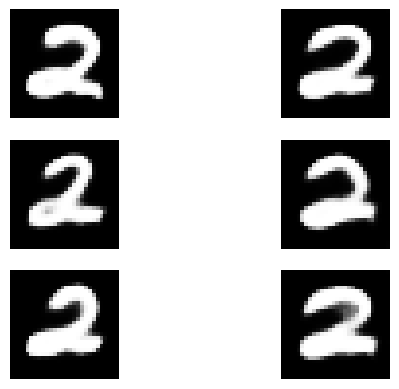

In [32]:
plot_noise_to_label(model, noise, label = 2, path = 'two.png')

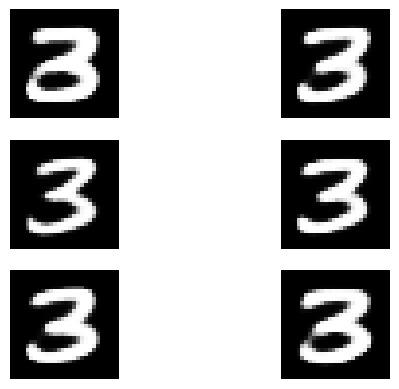

In [33]:
plot_noise_to_label(model, noise, label = 3, path = 'three.png')

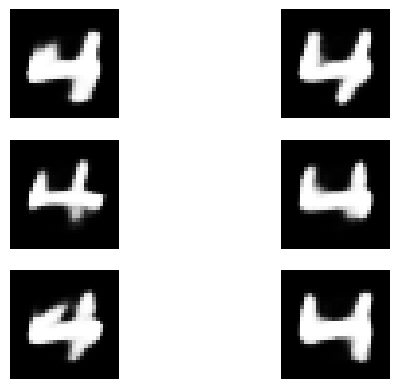

In [34]:
plot_noise_to_label(model, noise, label = 4, path = 'four.png')

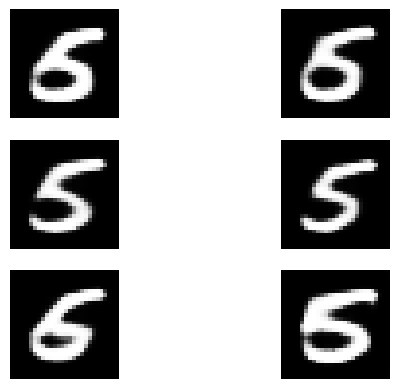

In [35]:
plot_noise_to_label(model, noise, label = 5, path = 'five.png')

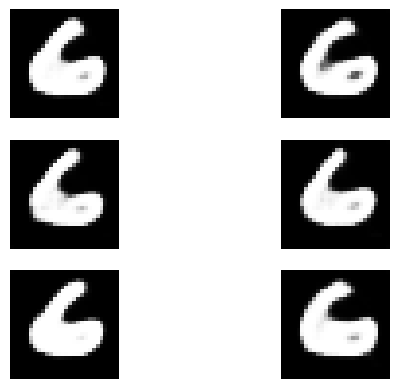

In [36]:
plot_noise_to_label(model, noise, label = 6, path = 'six.png')

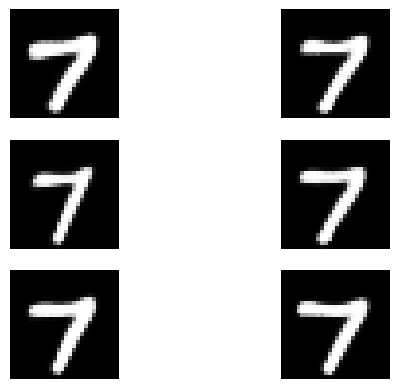

In [37]:
plot_noise_to_label(model, noise, label = 7, path = 'seven.png')

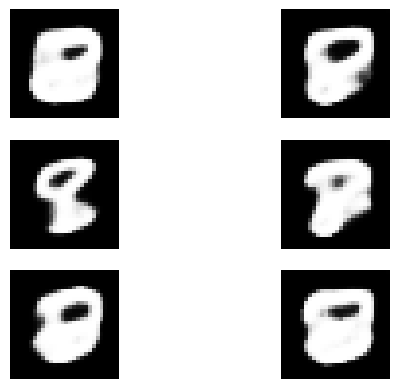

In [38]:
plot_noise_to_label(model, noise, label = 8, path = 'eight.png')

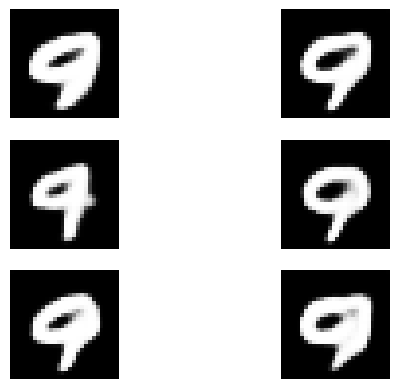

In [39]:
plot_noise_to_label(model, noise, label = 9, path = 'nine.png')